# Adaptive Thresholding Based Retinal Vessel Segmentation
**A Project of IE4476 Image Processing, AY 2022/23 Sem 1, School of Electrical & Electronic Engineering, Nanyang Technological University**

Student: Tran Anh Quan, EEE/4

## Setting Up Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
#Change the current working directory to the path of Google Cloud Drive
path="/content/drive/My Drive/"
os.chdir(path)

from matplotlib import pyplot as plt

## Load the image for segmentation
Image 24_training.tif and its groud truth is loaded

(584, 565, 3)
(584, 565)


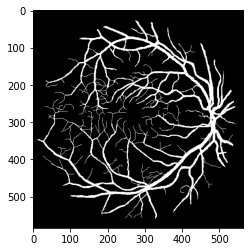

In [ ]:
import numpy as np
import cv2 
import sys

from PIL import Image

img = cv2.imread('/content/drive/MyDrive/image_processing/24_training.tif')
ground_truth = Image.open('/content/drive/MyDrive/image_processing/24_manual1(1).gif')
ground_truth = np.array(ground_truth)

# show the ground truth image
print(np.shape(img))
print(np.shape(ground_truth))
plt.imshow(ground_truth, "gray")

## Evaluation Metrics
I used Accuracy, F1 Score, and MCC

In [ ]:
import math

def accuracy(predicted, ground_trth):
  a = (predicted==ground_trth)
  x = np.count_nonzero(a == 1)
  w,h=np.shape(predicted)
  return x/(w*h)

def precision(predicted, ground_trth):
  TP = np.count_nonzero(np.logical_and((predicted==ground_trth), ground_trth==255)==1)
  FP = np.count_nonzero(np.logical_and((predicted!=ground_trth), predicted==255)==1)
  return TP/(TP+FP)

def recall(predicted, ground_trth):
  TP = np.count_nonzero(np.logical_and((predicted==ground_trth), ground_trth==255)==1)
  FN = np.count_nonzero(np.logical_and((predicted!=ground_trth), ground_trth==255)==1)
  return TP/(TP+FN)

def f1_score(predicted, ground_trth):
  pr = precision(predicted, ground_trth)
  rc = recall(predicted, ground_trth)
  f1 = 2/(1/pr+1/rc)
  return f1

def MCC(predicted, ground_trth):
  TP = np.count_nonzero(np.logical_and((predicted==ground_trth), ground_trth==255)==1)
  TN = np.count_nonzero(np.logical_and((predicted==ground_trth), ground_trth==255)==0)
  FP = np.count_nonzero(np.logical_and((predicted!=ground_trth), predicted==255)==1)
  FN = np.count_nonzero(np.logical_and((predicted!=ground_trth), ground_trth==255)==1)
  mcc = (TN*TP-FN*FP)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
  return mcc

def eval(predicted, ground_trth):
  print("Accuracy: ", accuracy(predicted, ground_truth))
  print("Precision: ", precision(predicted, ground_truth))
  print("Recall: ", recall(predicted, ground_truth))
  print("F1 Score: ", f1_score(predicted, ground_truth))
  print("Matthew’s correlation coefficient: ", MCC(predicted, ground_truth))

## Main function for the segmentation

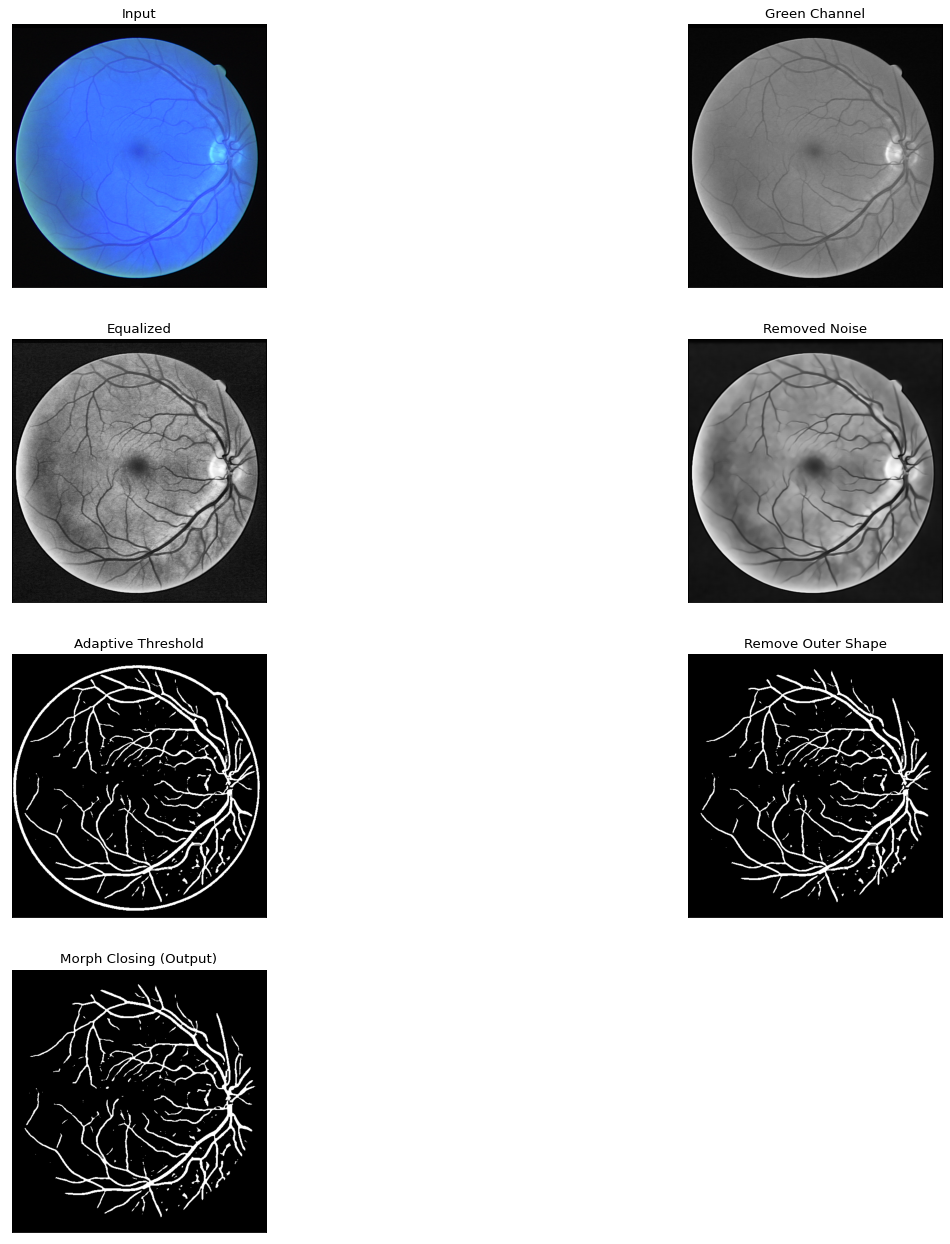

Accuracy min:  0.8841405018790156
Accuracy:  0.9521244999393866
Precision:  0.8791238507301244
Recall:  0.6803212221088702
F1 Score:  0.7670505655257842
Matthew’s correlation coefficient:  0.749677970313292


In [ ]:
plt.figure(figsize=(20, 20), dpi=80)

def auto_segment(input, visualize = False):
  # green channel extraction
  img_green = input[:,:,1]

  # create a CLAHE object 
  clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))

  # apply CLAHE into the Green channel
  img_equalized = clahe.apply(img_green)

  # denoise the equalized image
  noiseless_image_bw = cv2.fastNlMeansDenoising(img_equalized, None, 17, 7, 11) 

  # apply adaptive gaussian thresholding
  thresholded = cv2.adaptiveThreshold(noiseless_image_bw,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,6)
  
  # connected component analysis
  num_labels, labels_im = cv2.connectedComponents(thresholded)

  # extracting the fundus border
  mask = (labels_im==1).astype(np.uint8)
  mask = mask*255 
  
  # remove the fundus border by an XOR operation
  removed = cv2.bitwise_xor(thresholded, mask)
  
  kernel = np.array([[1,0,1],
                      [0,1,0],
                      [1,0,1]]).astype(np.uint8)
  # morphological closing
  closed = cv2.morphologyEx(removed, cv2.MORPH_CLOSE, kernel)
  im_pil = Image.fromarray(closed)
  im_pil.save("output.gif")
  
  if visualize:
    titles = ["Input", "Green Channel", "Equalized", "Removed Noise", "Adaptive Threshold", "Remove Outer Shape", "Morph Closing (Output)"]
    images = [input, img_green, img_equalized, noiseless_image_bw, thresholded, removed, closed]
    for i in range(7):
      plt.subplot(4,2,i+1),plt.imshow(images[i],'gray')
      plt.title(titles[i])
      plt.xticks([]),plt.yticks([])
    plt.show()
  return closed

# run the model on the image and evaluate the result
out = auto_segment(img, visualize = True)
z = np.zeros(np.shape(ground_truth))
print("Accuracy min: ", accuracy(z, ground_truth))
eval(out, ground_truth)

## Running the model on the assigned images 25_test(1).tif

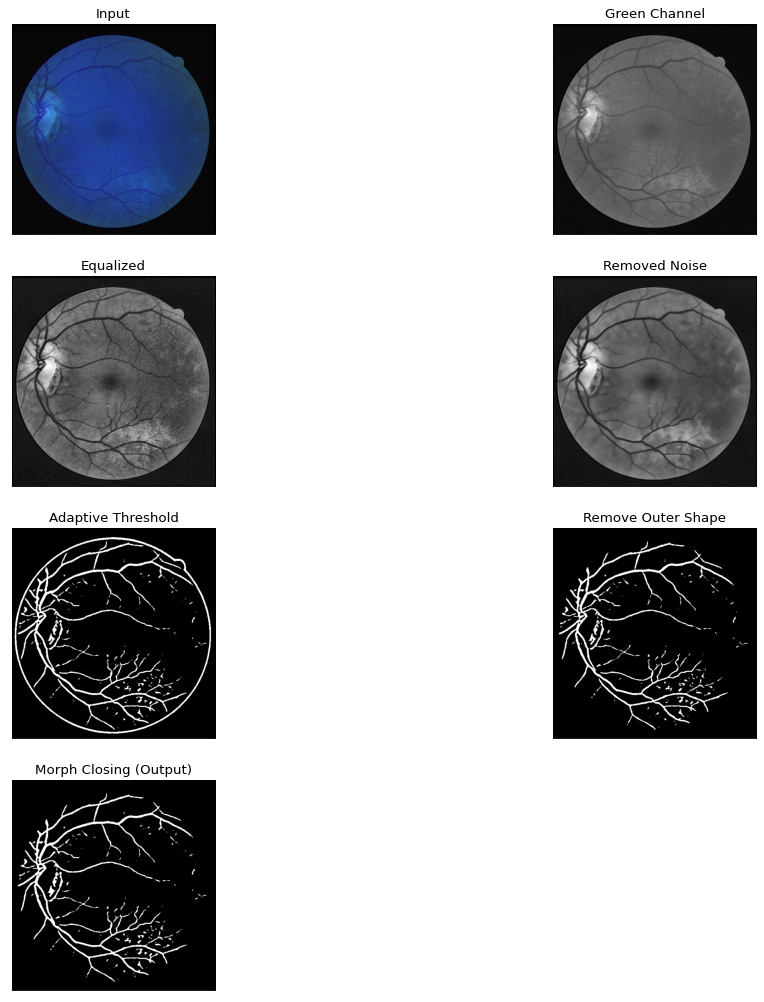

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
plt.figure(figsize=(16, 16), dpi=80)

test_img = cv2.imread('/content/drive/MyDrive/DRIVE/25_test(1).tif')
auto_segment(test_img, visualize = True)

## Run and evaluate the model on 4 images 24, 26, 32, 34 of the DRIVE's training set

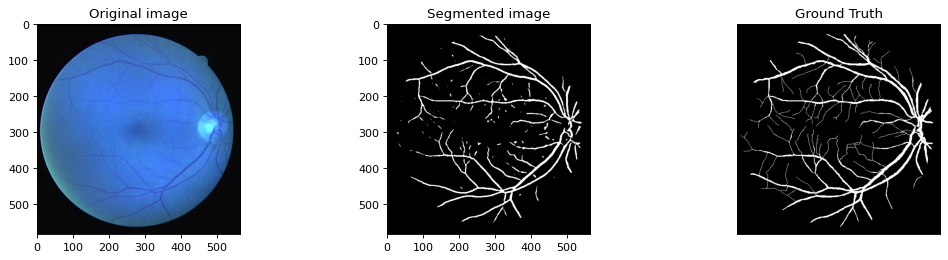

Evaluation result for /content/drive/MyDrive/DRIVE/training/images/32_training.tif
Accuracy:  0.963589526003152
Precision:  0.8275424470505863
Recall:  0.7008227097539282
F1 Score:  0.7589292880648526
Matthew’s correlation coefficient:  0.7430976780984379




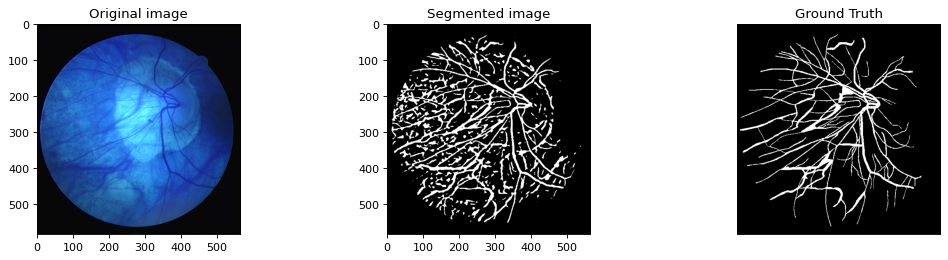

Evaluation result for /content/drive/MyDrive/DRIVE/training/images/34_training.tif
Accuracy:  0.894893320402473
Precision:  0.47608487173339725
Recall:  0.7380369808281971
F1 Score:  0.5788022686697677
Matthew’s correlation coefficient:  0.5441353760754511




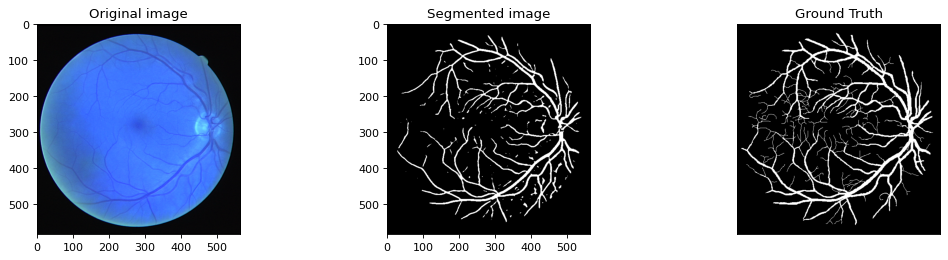

Evaluation result for /content/drive/MyDrive/DRIVE/training/images/24_training.tif
Accuracy:  0.9521244999393866
Precision:  0.8791238507301244
Recall:  0.6803212221088702
F1 Score:  0.7670505655257842
Matthew’s correlation coefficient:  0.749677970313292




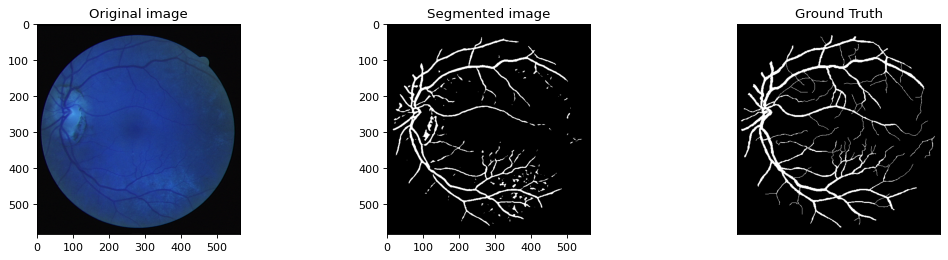

Evaluation result for /content/drive/MyDrive/DRIVE/training/images/26_training.tif
Accuracy:  0.9580676445629773
Precision:  0.8033655757254539
Recall:  0.6596670656076596
F1 Score:  0.7244593141355001
Matthew’s correlation coefficient:  0.7069509870692243




In [ ]:
val_image_path_list=[
    '/content/drive/MyDrive/DRIVE/training/images/32_training.tif', 
    '/content/drive/MyDrive/DRIVE/training/images/34_training.tif', 
    '/content/drive/MyDrive/DRIVE/training/images/24_training.tif', 
    '/content/drive/MyDrive/DRIVE/training/images/26_training.tif', 
]

val_image_groundtruth_list = [
    '/content/drive/MyDrive/DRIVE/training/1st_manual/32_manual1.gif',
    '/content/drive/MyDrive/DRIVE/training/1st_manual/34_manual1.gif',
    '/content/drive/MyDrive/DRIVE/training/1st_manual/24_manual1.gif',
    '/content/drive/MyDrive/DRIVE/training/1st_manual/26_manual1.gif'
]

save_name = [
    "32_inf_threshold.gif",
    "34_inf_threshold.gif",
    "24_inf_threshold.gif",
    "26_inf_threshold.gif"
]

for i in range(4):
  plt.figure(figsize=(16, 16), dpi=80)
  img = cv2.imread(val_image_path_list[i])
  ground_truth = Image.open(val_image_groundtruth_list[i])
  ground_truth = np.array(ground_truth)

  out = auto_segment(img)
  plt.subplot(4,3,3*i+1),plt.imshow(img)
  plt.title("Original image") 
  plt.subplot(4,3,3*i+2),plt.imshow(out, "gray")
  plt.title("Segmented image")
  plt.subplot(4,3,3*i+3),plt.imshow(ground_truth, "gray")
  plt.title("Ground Truth")
  plt.xticks([]),plt.yticks([])
  plt.show()

  from PIL import Image 
  print("Evaluation result for "+val_image_path_list[i])
  eval(out, ground_truth)
  print("\n")

  im_pil = Image.fromarray(out)
  im_pil.save(save_name[i])